In [18]:
import numpy as np

# 1️⃣ Definição das Funções de Ativação
def relu(x):
    """Aplica a função de ativação ReLU."""
    return np.maximum(0, x)

def softmax(x):
    """Aplica a função Softmax para classificação."""
    exp_x = np.exp(x - np.max(x))  # Estabiliza valores grandes
    return exp_x / exp_x.sum(axis=1, keepdims=True)

# 2️⃣ Criando a Estrutura da Rede Neural (Apenas Forward Pass)
class RedeNeural:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        np.random.seed(42)  # Garantir reprodutibilidade
        
        # Inicializando pesos e bias para cada camada
        self.W1 = np.random.randn(input_size, hidden_size1) * 0.1
        self.b1 = np.zeros((1, hidden_size1))
        
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * 0.1
        self.b2 = np.zeros((1, hidden_size2))
        
        self.W3 = np.random.randn(hidden_size2, output_size) * 0.1
        self.b3 = np.zeros((1, output_size))
    
    def forward(self, X):
        """Executa a passagem forward da rede neural."""
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)  # Aplicando ReLU

        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)  # Aplicando ReLU

        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = softmax(self.Z3)  # Aplicando Softmax na saída

        return self.A3

# 3️⃣ Criando um Exemplo de Predição para Vendas
# Suponha que os dados de entrada sejam: Preço, Promoção, Estação do Ano
X_sample = np.array([
    [50, 1, 2],  # Produto com preço 50, promoção ativa, estação 2
    [80, 0, 1],  # Produto com preço 80, sem promoção, estação 1
])

# Criando a rede neural
modelo = RedeNeural(input_size=3, hidden_size1=4, hidden_size2=3, output_size=2)

# Fazendo a predição (forward pass)
preds = modelo.forward(X_sample)

# Exibindo as previsões
print("Saída da Rede Neural (Probabilidades por Classe):\n", preds)


Saída da Rede Neural (Probabilidades por Classe):
 [[0.5 0.5]
 [0.5 0.5]]


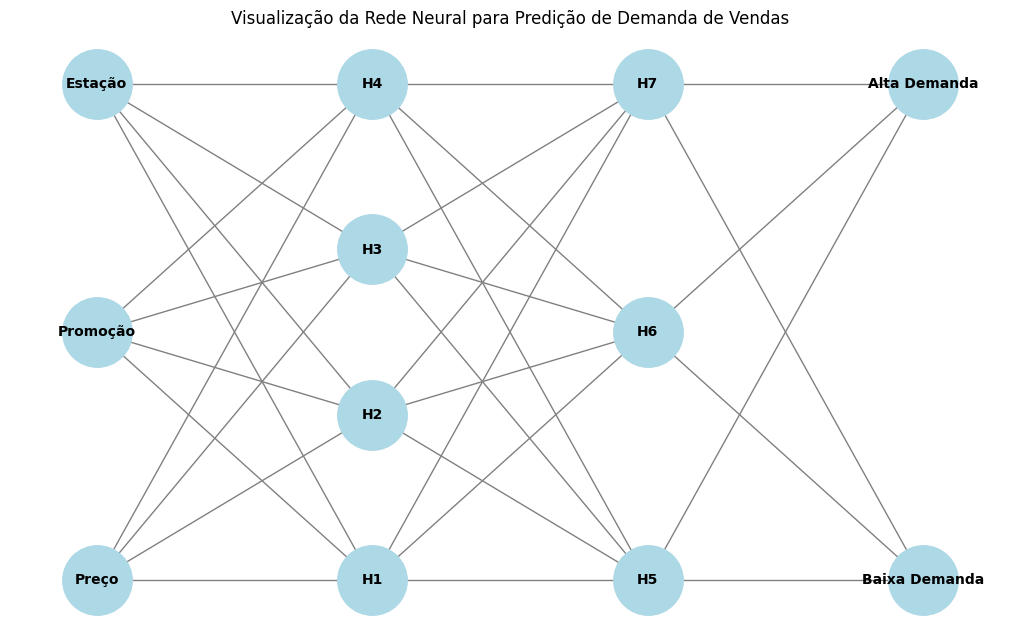

In [19]:
# Reexecutando a geração da visualização da rede neural após o reset do estado

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def plot_neural_network():
    """
    Plota uma visualização da rede neural de múltiplas camadas com:
    - 3 neurônios de entrada (Preço, Promoção, Estação)
    - 2 camadas ocultas (4 e 3 neurônios)
    - 2 neurônios de saída (Classes de demanda)
    """

    G = nx.DiGraph()

    # Definição das camadas da rede neural
    layers = {
        "Entrada": ["Preço", "Promoção", "Estação"],
        "Camada Oculta 1": ["H1", "H2", "H3", "H4"],
        "Camada Oculta 2": ["H5", "H6", "H7"],
        "Saída": ["Baixa Demanda", "Alta Demanda"],
    }

    positions = {}
    x_offset = 0

    for layer_name, nodes in layers.items():
        y_offset = np.linspace(-1, 1, len(nodes))
        for i, node in enumerate(nodes):
            positions[node] = (x_offset, y_offset[i])
        x_offset += 1

    for i in range(len(layers) - 1):
        layer_1 = list(layers.values())[i]
        layer_2 = list(layers.values())[i + 1]

        for node1 in layer_1:
            for node2 in layer_2:
                G.add_edge(node1, node2)

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos=positions, with_labels=True, node_color="lightblue", edge_color="gray",
            node_size=2500, font_size=10, font_weight="bold", arrows=False)
    plt.title("Visualização da Rede Neural para Predição de Demanda de Vendas")
    plt.show()

# Gerar visualização
plot_neural_network()


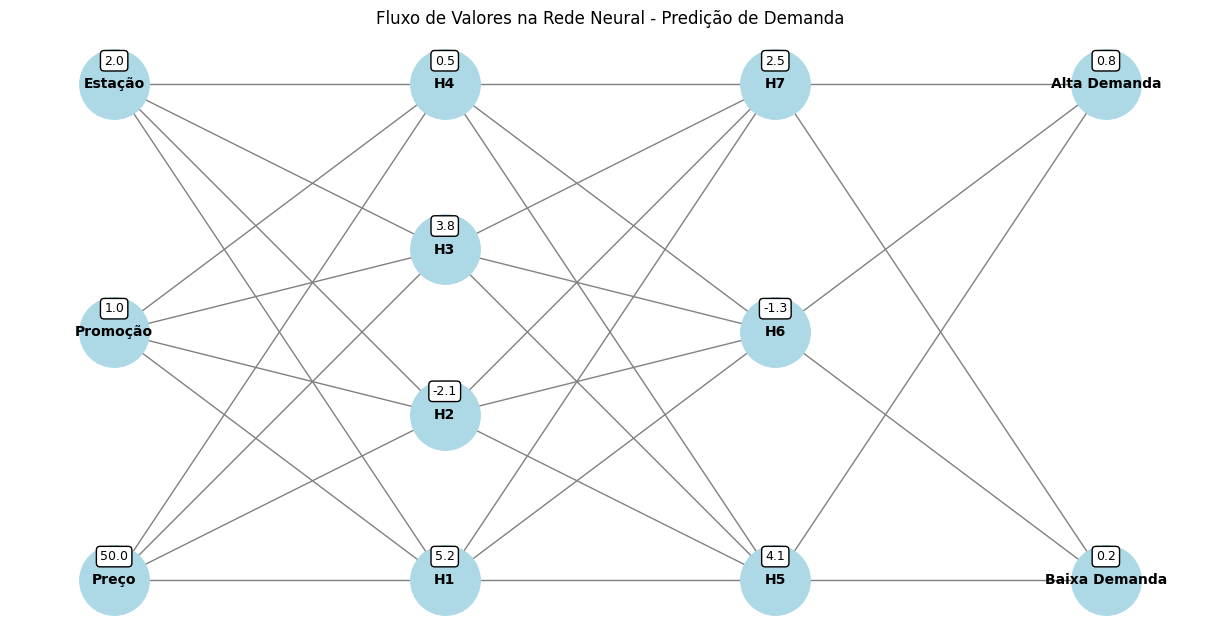

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def plot_neural_network_with_values():
    """
    Plota uma rede neural mostrando como os valores fluem pelos neurônios
    usando um exemplo de entrada real para previsão de demanda de vendas.
    """

    G = nx.DiGraph()

    # Definição das camadas e valores de entrada
    entrada = {"Preço": 50, "Promoção": 1, "Estação": 2}
    camada_oculta1 = {"H1": 5.2, "H2": -2.1, "H3": 3.8, "H4": 0.5}
    camada_oculta2 = {"H5": 4.1, "H6": -1.3, "H7": 2.5}
    saida = {"Baixa Demanda": 0.2, "Alta Demanda": 0.8}

    layers = {
        "Entrada": entrada,
        "Camada Oculta 1": camada_oculta1,
        "Camada Oculta 2": camada_oculta2,
        "Saída": saida,
    }

    positions = {}
    x_offset = 0

    for layer_name, nodes in layers.items():
        y_offset = np.linspace(-1, 1, len(nodes))
        for i, (node, value) in enumerate(nodes.items()):
            positions[node] = (x_offset, y_offset[i])
        x_offset += 1

    for i in range(len(layers) - 1):
        layer_1 = list(layers.values())[i]
        layer_2 = list(layers.values())[i + 1]

        for node1 in layer_1:
            for node2 in layer_2:
                G.add_edge(node1, node2)

    plt.figure(figsize=(12, 6))
    nx.draw(G, pos=positions, with_labels=True, node_color="lightblue", edge_color="gray",
            node_size=2500, font_size=10, font_weight="bold", arrows=False)

    # Adicionando valores nos nós
    for layer_name, nodes in layers.items():
        for node, (x, y) in positions.items():
            if node in nodes:
                plt.text(x, y + 0.08, f"{nodes[node]:.1f}", fontsize=9, ha="center", color="black", 
                         bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))

    plt.title("Fluxo de Valores na Rede Neural - Predição de Demanda")
    plt.show()

# Gerar visualização da rede neural com passagem de valores
plot_neural_network_with_values()


/Users/ralph/.pyenv/versions/3.9.19/envs/IA/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


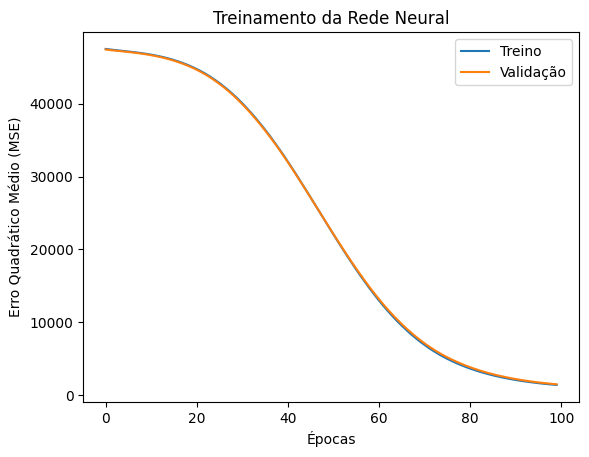

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


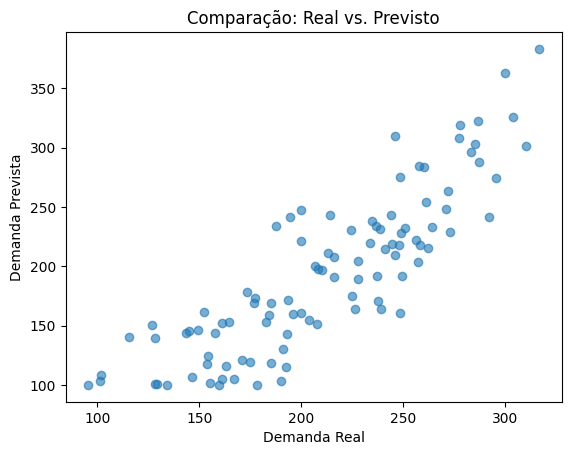

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Criando um dataset sintético de demanda de vendas
np.random.seed(42)
n = 500

preco = np.random.uniform(30, 100, n)  # Preço entre 30 e 100
promocao = np.random.choice([0, 1], n)  # Promoção (0 = Não, 1 = Sim)
estacao = np.random.choice([0, 1, 2, 3], n)  # Primavera, Verão, Outono, Inverno

# Criando demanda de vendas (com influência dos fatores acima)
demanda = (300 - (preco * 2)) + (promocao * 50) + (estacao * 10) + np.random.normal(0, 20, n)

# Criando DataFrame
df = pd.DataFrame({"Preço": preco, "Promoção": promocao, "Estação": estacao, "Demanda": demanda})

# Separando em treino e teste
X = df[["Preço", "Promoção", "Estação"]]
y = df["Demanda"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando a Rede Neural
modelo = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(3,)),  
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)  # Saída contínua (regressão)
])

# Compilando e treinando o modelo
modelo.compile(optimizer="adam", loss="mse", metrics=["mae"])
historico = modelo.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Plotando a perda ao longo do treinamento
plt.plot(historico.history["loss"], label="Treino")
plt.plot(historico.history["val_loss"], label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.title("Treinamento da Rede Neural")
plt.legend()
plt.show()

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Comparando previsão com valores reais
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Demanda Real")
plt.ylabel("Demanda Prevista")
plt.title("Comparação: Real vs. Previsto")
plt.show()


In [ ]:
# %pip install tensorflow --upgrade